# WGA Segmentation

In [1]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import WGASegmentation
from scportrait.pipeline.selection import LMDSelection

/Users/sophia/mambaforge/envs/scportrait_test/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
project_location = "project_WGA"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example1_WGASegmentation.yml",
    overwrite=True,
    debug=True,
    segmentation_f=WGASegmentation,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[27/02/2025 18:00:09] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_WGA/config.yml
[27/02/2025 18:00:09] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1.
[27/02/2025 18:00:09] Compression algorithm for extracted single-cell images: lzf
[27/02/2025 18:00:09] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1.


In [3]:
from scportrait.data._datasets import dataset_1

dataset_1_path = dataset_1()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_1_path}/Ch1.tif", f"{dataset_1_path}/Ch2.tif", f"{dataset_1_path }/Ch3.tif"]

project.load_input_from_tif_files(images)

[27/02/2025 18:00:09] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_WGA/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_WGA/scport
         rait.sdata                                                                                                
[27/02/2025 18:00:09] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_5bsq40d5 for Project
[27/02/2025 18:00:09] Image input_image written to sdata object.
[27/02/2025 18:00:09] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_5bsq40d5'>


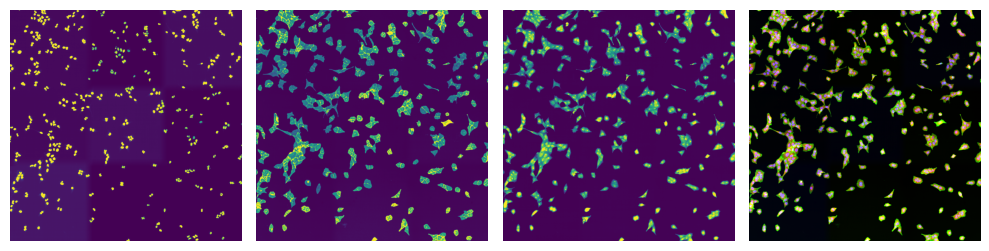

In [4]:
# visualize input images as example
# it is not recommended to execute this block with large input images as it will compute for some time

from scportrait.plotting.vis import generate_composite

fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].imshow(project.input_image[0])
axs[0].axis("off")

axs[1].imshow(project.input_image[1])
axs[1].axis("off")

axs[2].imshow(project.input_image[2])
axs[2].axis("off")

img = generate_composite(project.input_image)

axs[3].imshow(img)
axs[3].axis("off")

fig.tight_layout()

[27/02/2025 18:00:13] Normalization of the input image will be performed.
[27/02/2025 18:00:13] Normalizing each channel to the same range
[27/02/2025 18:00:14] Performing median filtering on input image
[27/02/2025 18:00:25] Percentile normalization of nucleus input image to range 0.01, 0.99
[27/02/2025 18:00:25] Normalizing each channel to the same range
[27/02/2025 18:00:25] Using local thresholding with a threshold of 0.2 to calculate nucleus mask.


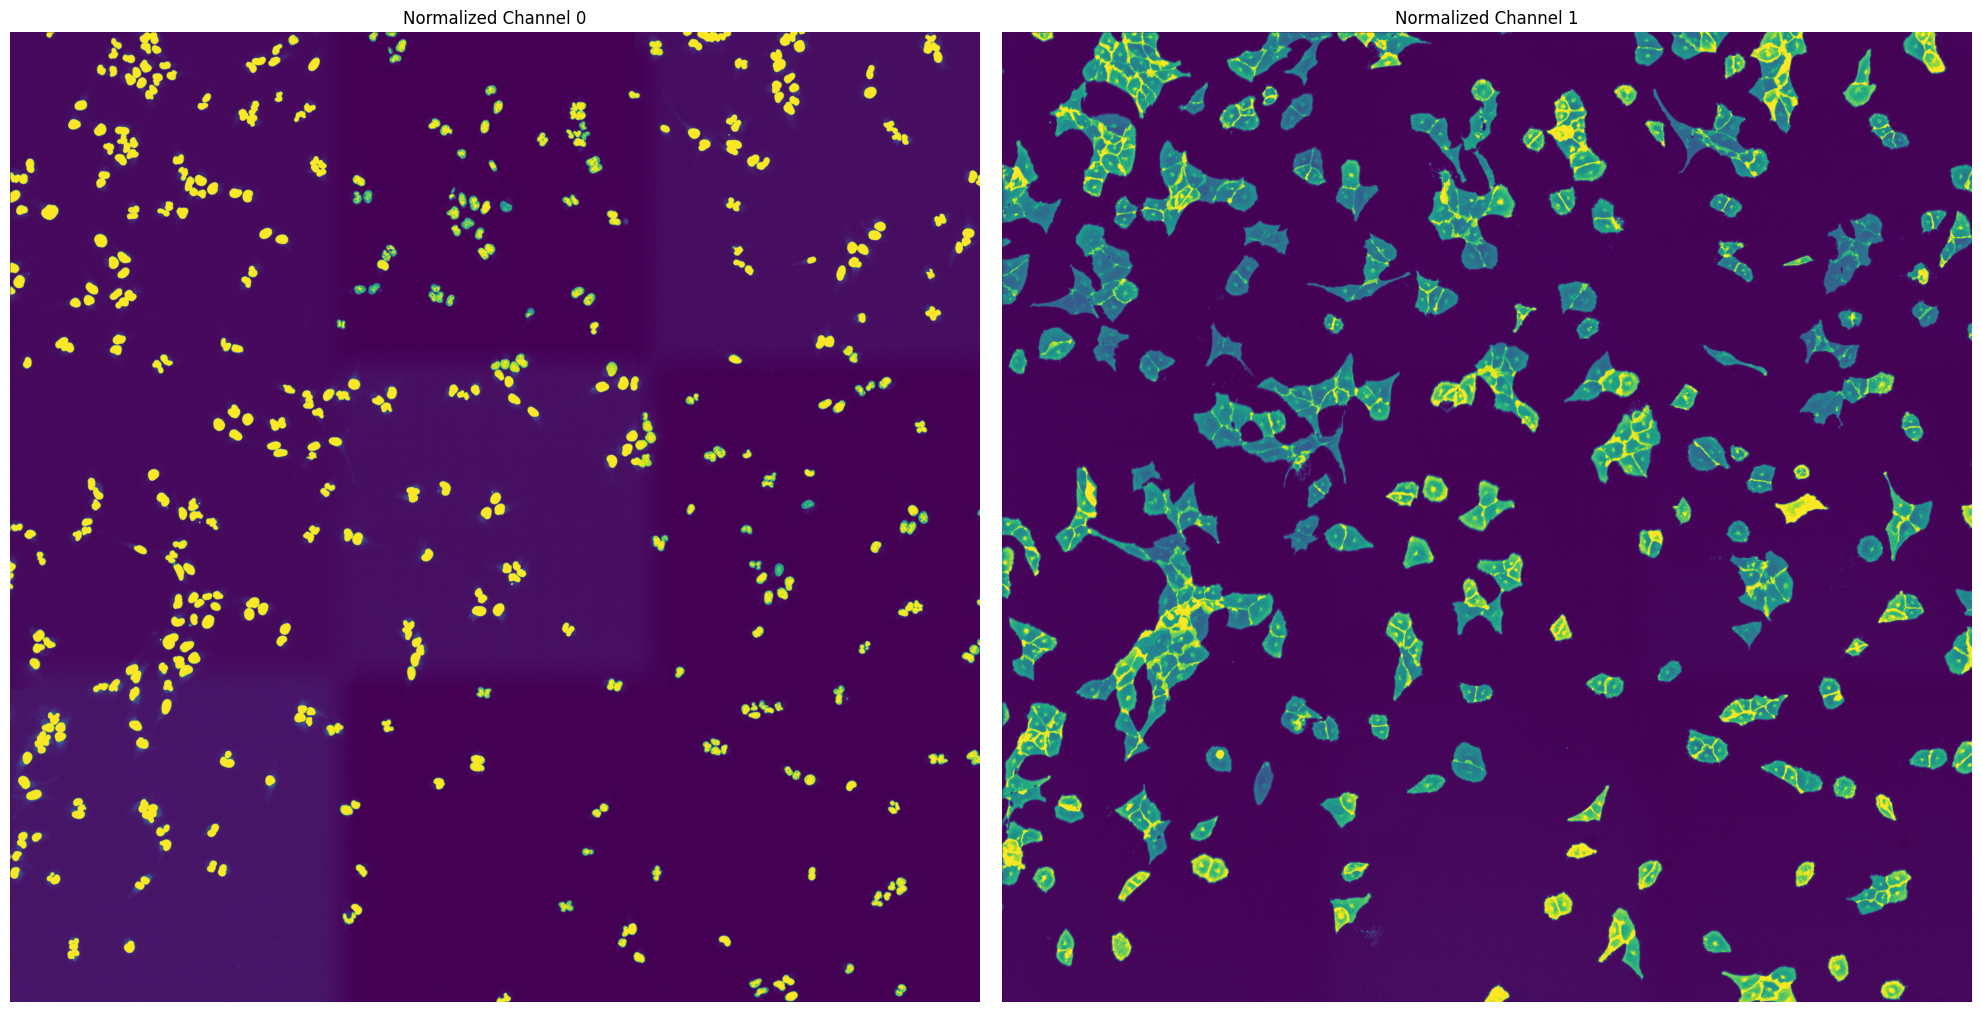

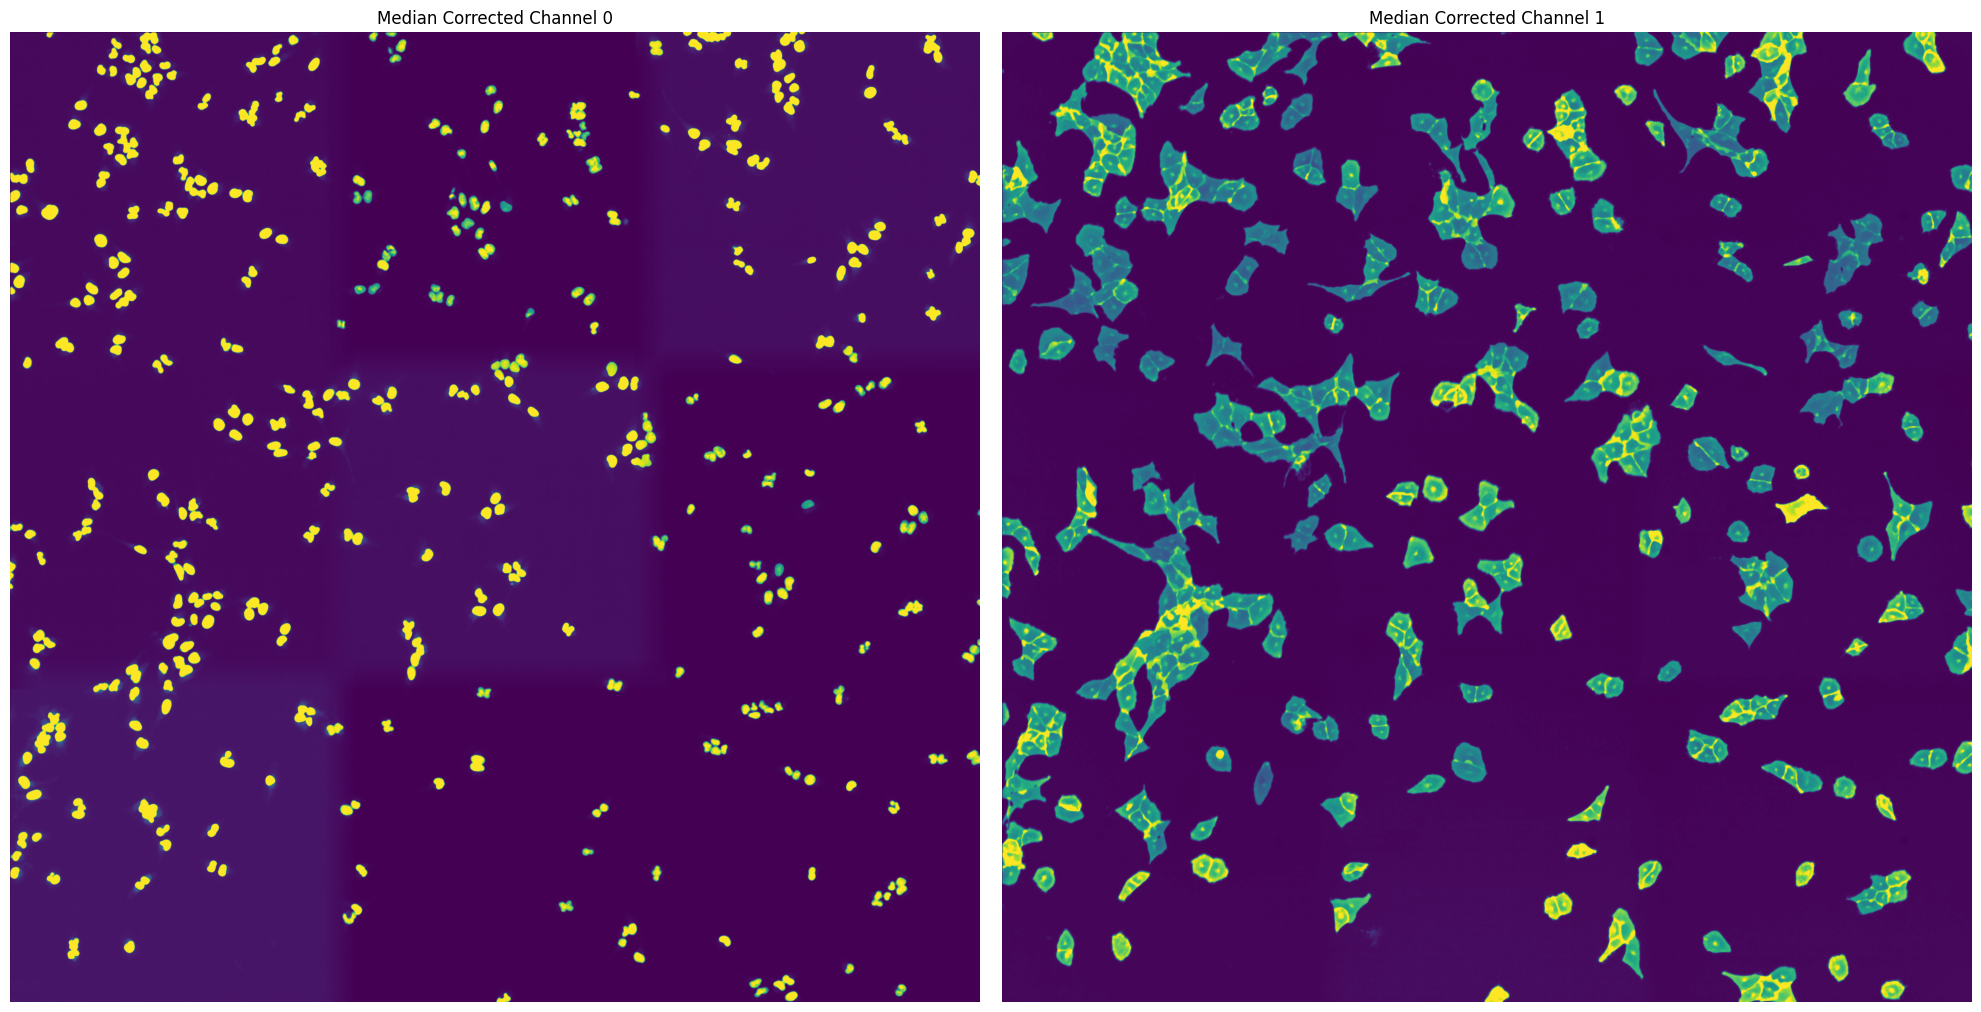

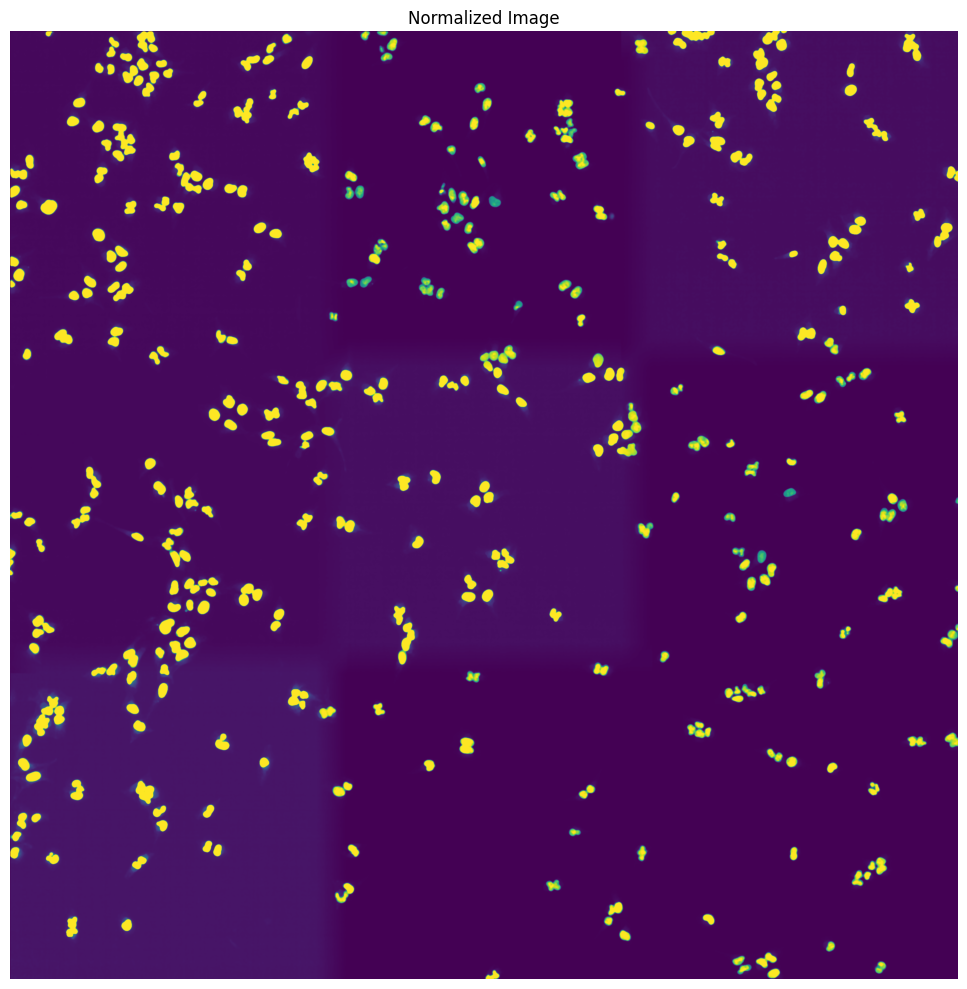

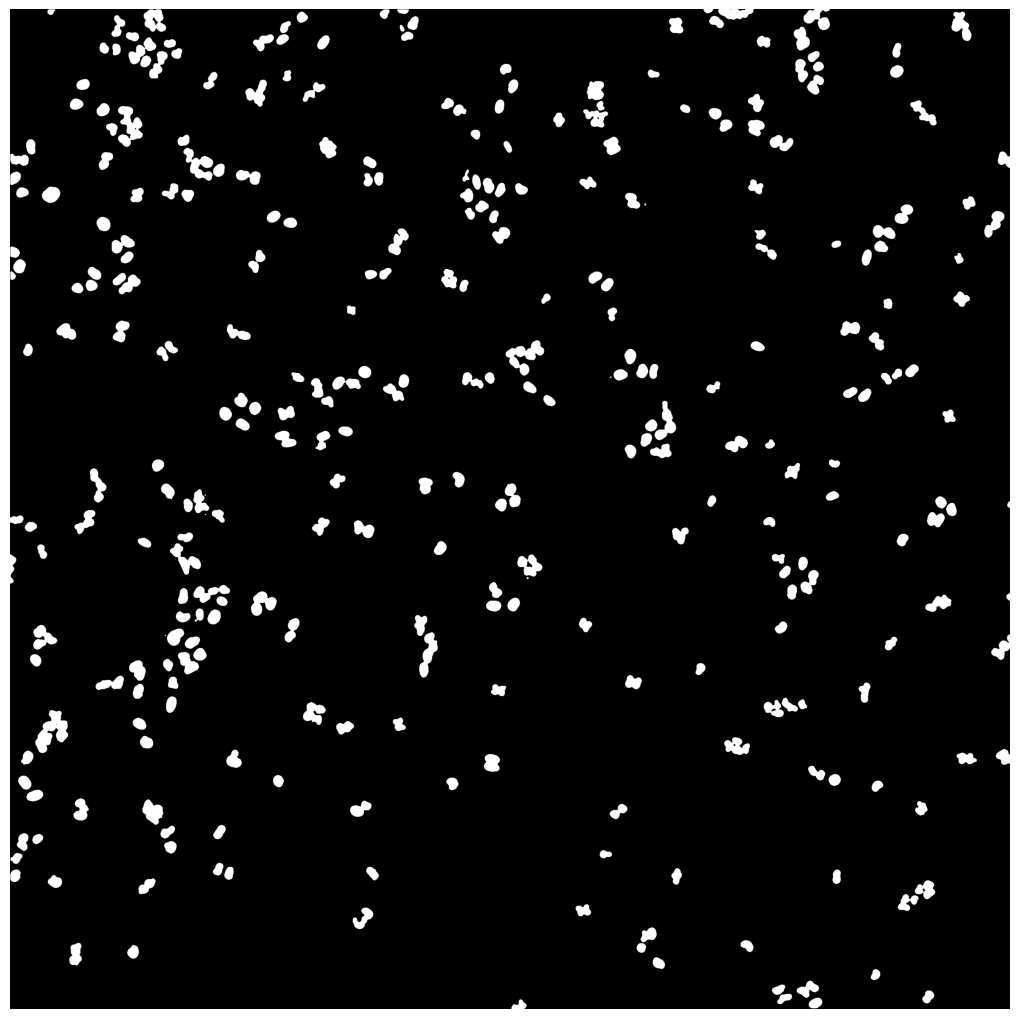

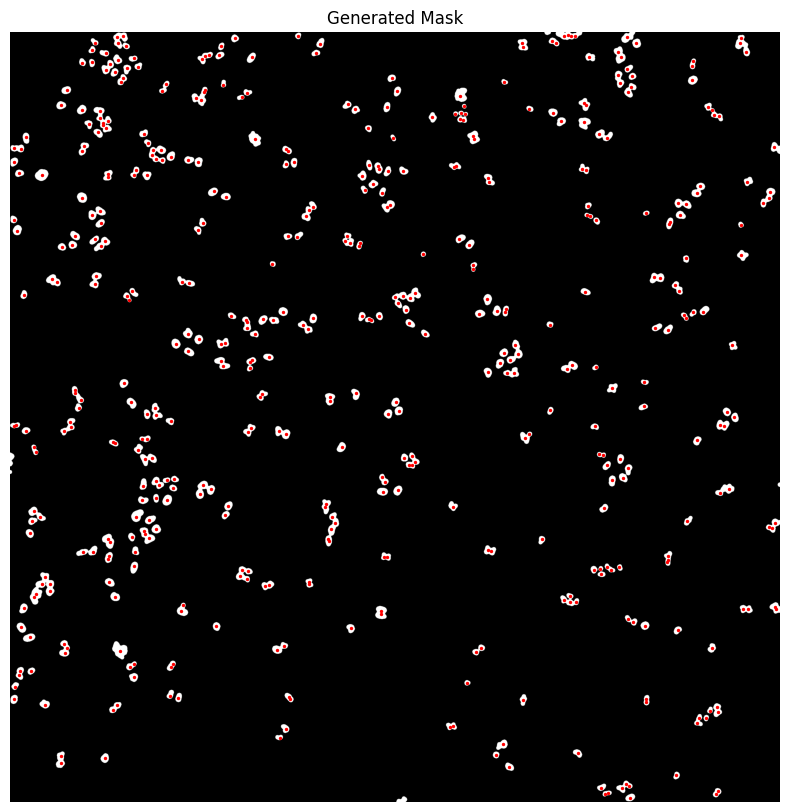

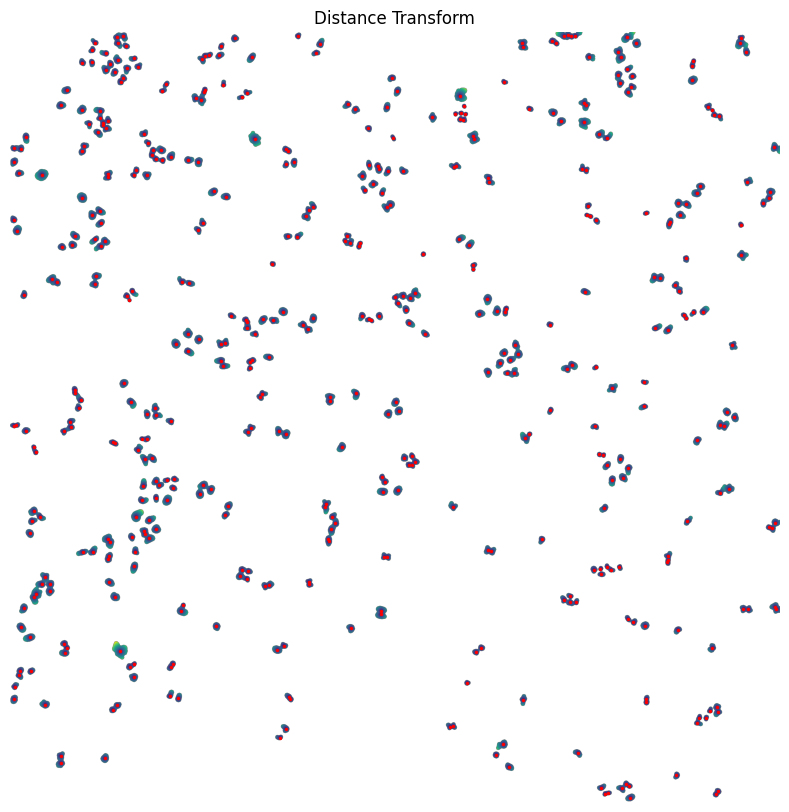

[27/02/2025 18:00:43] Performing filtering of nucleus with specified thresholds [200, 1000] from config file.
[27/02/2025 18:00:43] Removed 46 nuclei as they fell outside of the threshold range [200, 1000].
[27/02/2025 18:00:44] Total time to perform nucleus size filtering: 1.0312738418579102 seconds


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[27/02/2025 18:00:45] Filtered out 6 nuclei due to contact filtering.
[27/02/2025 18:00:45] Normalizing each channel to the same range
[27/02/2025 18:00:48] Cytosol Potential Mask generated.
[27/02/2025 18:00:49] Performing filtering of cytosol with specified thresholds [200, 6000] from config file.


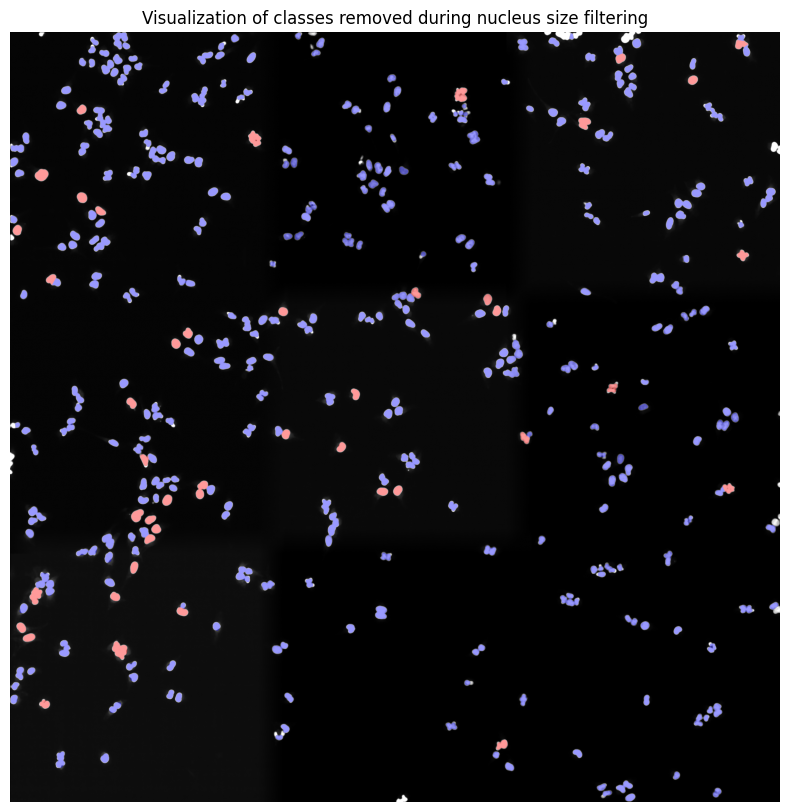

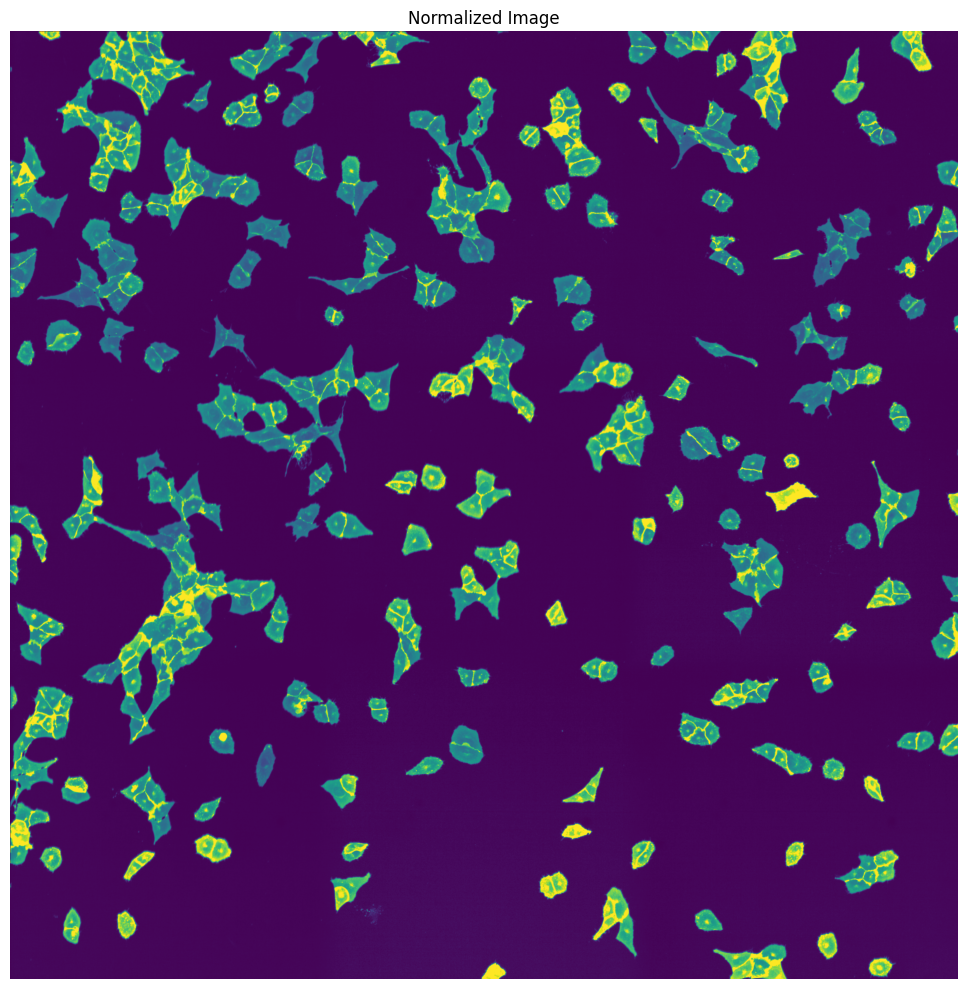

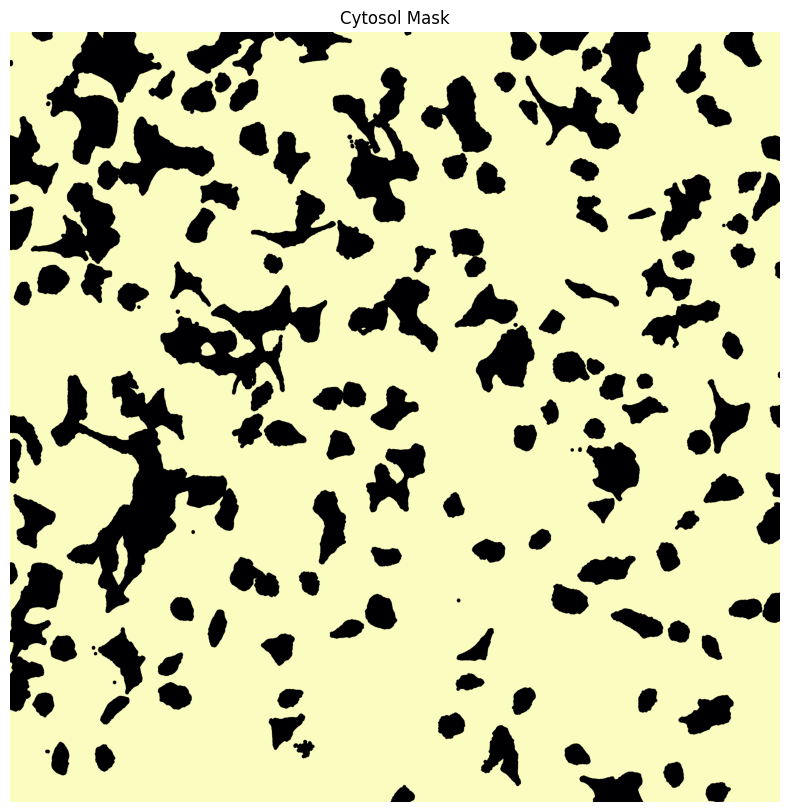

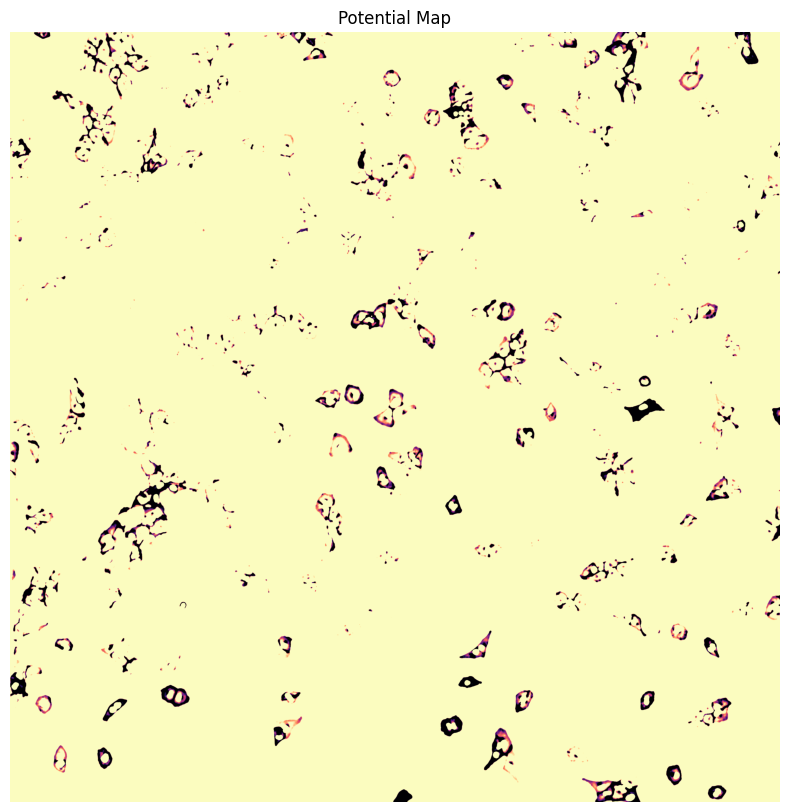

[27/02/2025 18:00:52] Removed 78 nuclei as they fell outside of the threshold range [200, 6000].
[27/02/2025 18:00:53] Total time to perform cytosol size filtering: 3.7878518104553223 seconds
[27/02/2025 18:00:55] Segmentation seg_all_nucleus written to sdata object.
[27/02/2025 18:00:55] Points centers_seg_all_nucleus written to sdata object.
[27/02/2025 18:00:55] Segmentation seg_all_cytosol written to sdata object.
[27/02/2025 18:00:55] Points centers_seg_all_cytosol written to sdata object.


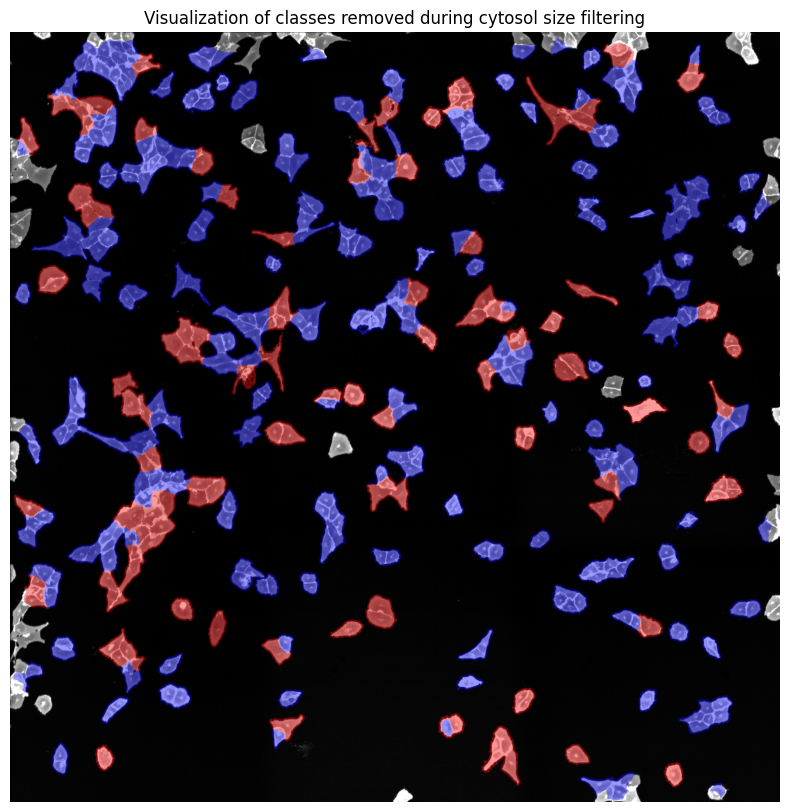

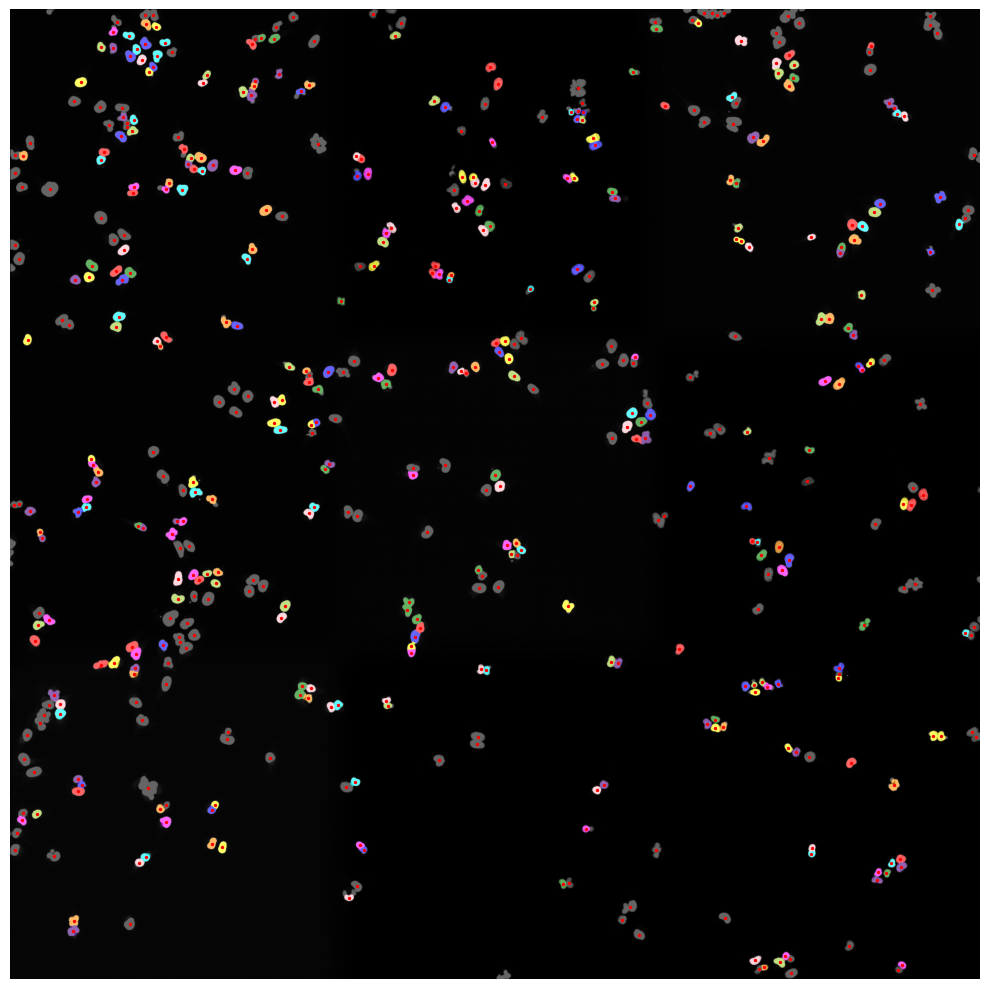

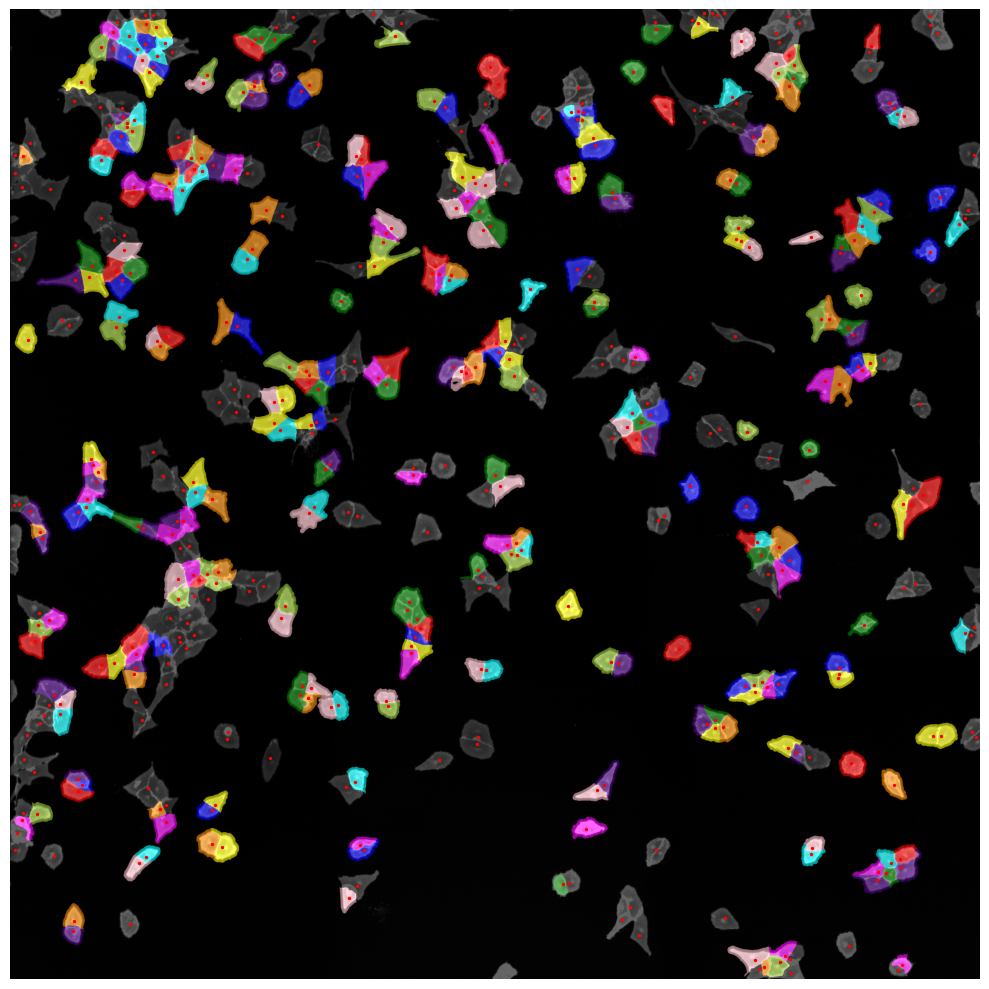

In [5]:
project.segment()

(-0.5, 3036.5, 3038.5, -0.5)

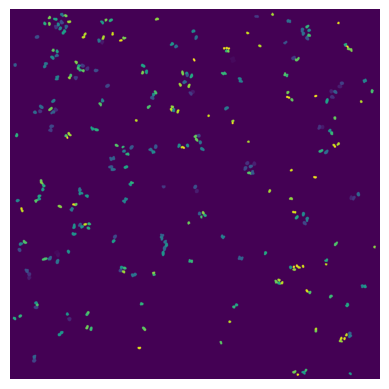

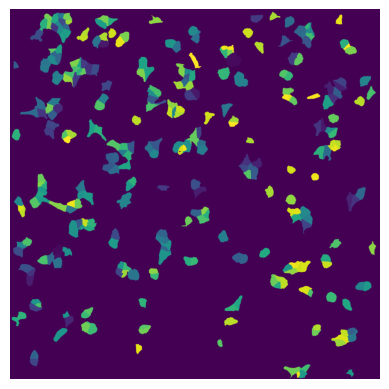

In [6]:
plt.figure()
plt.imshow(project.sdata["seg_all_nucleus"])
plt.axis("off")

plt.figure()
plt.imshow(project.sdata["seg_all_cytosol"])
plt.axis("off")

In [7]:
project.extract()

[27/02/2025 18:01:00] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/HDF5CellExtraction_iisooqvg for HDF5CellExtraction
[27/02/2025 18:01:00] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_WGA/extraction/data
[27/02/2025 18:01:00] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_WGA/extraction/data
[27/02/2025 18:01:00] Found 2 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus', 'seg_all_cytosol']
[27/02/2025 18:01:00] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[27/02/2025 18:01:00] A total of 13 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/exam

Extracting cell batches: 100%|██████████| 4/4 [00:05<00:00,  1.49s/it]


[27/02/2025 18:01:06] Finished extraction in 6.36 seconds (49.38 cells / second)
[27/02/2025 18:01:07] Benchmarking times saved to file.
[27/02/2025 18:01:07] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/HDF5CellExtraction_iisooqvg'>


(314, 5, 128, 128)


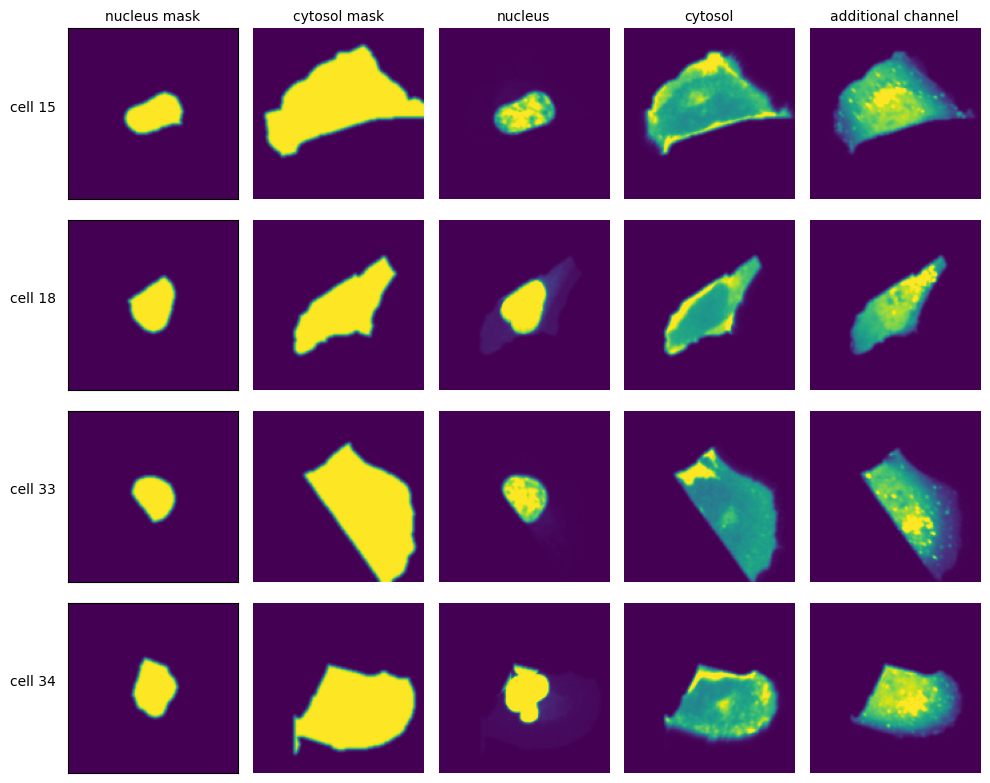

In [8]:
with h5py.File(f"{project_location}/extraction/data/single_cells.h5") as hf:
    index = hf.get("single_cell_index")
    images = hf.get("single_cell_data")

    print(images.shape)

    n_cells = [2, 3, 4, 5]
    fig, axs = plt.subplots(len(n_cells), 5, figsize=(5 * 2, len(n_cells) * 2))
    labels = ["nucleus mask", "cytosol mask", "nucleus", "cytosol", "additional channel"]

    for i, id in enumerate(n_cells):
        cell_id = index[id][1]
        image = images[id]

        for n, _img in enumerate(image):
            axs[i, n].imshow(_img)

            if n == 0:
                axs[i, n].set_ylabel(f"cell {cell_id}", fontsize=10, rotation=0, labelpad=25)
                axs[i, n].xaxis.set_visible(False)
                axs[i, n].tick_params(left=False, labelleft=False)
            else:
                axs[i, n].axis("off")

            if i == 0:
                axs[i, n].set_title(labels[n], fontsize=10)
    fig.tight_layout()

In [9]:
project.featurize()

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_WGA/extraction/data/single_cells.h5
[27/02/2025 18:01:07] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/CellFeaturizer_mogty9fq for CellFeaturizer
[27/02/2025 18:01:07] Started CellFeaturization of all available channels.
[27/02/2025 18:01:07] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_WGA/featurization/complete_CellFeaturizer
[27/02/2025 18:01:07] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[27/02/2025 18:01:07] Reading data from path: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_WGA/extraction/data/single_cells.h5
[27/02/2025 18:01:07] Dataloader generated with a batchsize of 

In [10]:
# load classification results
results = pd.read_csv(f"{project_location}/featurization/complete_CellFeaturizer/calculated_image_features.csv")
results

nucleus_area  cytosol_area  cytosol_only_area  1_mean_nucleus  \
0          1560.0        6189.0             4629.0        0.072425   
1          1451.0        7262.0             5819.0        0.048770   
2          1529.0        6399.0             4892.0        0.050661   
3          1579.0        3789.0             2262.0        0.066313   
4          1311.0        6037.0             4726.0        0.047081   
..            ...           ...                ...             ...   
309         599.0        2756.0             2157.0        0.022552   
310         838.0        6042.0             5204.0        0.030730   
311         583.0        3381.0             2798.0        0.019132   
312         719.0        2246.0             1527.0        0.024316   
313         627.0        3767.0             3140.0        0.026140   

     1_median_nucleus  1_quant75_nucleus  1_quant25_nucleus  \
0                 0.0           0.028797                0.0   
1                 0.0           0.002569                0.0   
2                 0.0           0.002369                0.0   
3                 0.0           0.000000                0.0   
4                 0.0           0.001999                0.0   
..                ...                ...                ...   
309               0.0           0.000000                0.0   
310               0.0           0.001288                0.0   
311               0.0           0.000000                0.0   
312               0.0           0.000000                0.0   
313               0.0           0.000000                0.0   

     1_summed_intensity_nucleus  1_summed_intensity_area_normalized_nucleus  \
0                    1186.60670                                    0.256342   
1                     799.05190                                    0.137318   
2                     830.02990                                    0.169671   
3                    1086.47000                                    0.480314   
4                     771.37480                                    0.163219   
..                          ...                                         ...   
309                   369.49756                                    0.171302   
310                   503.47302                                    0.096747   
311                   313.46650                                    0.112032   
312                   398.39990                                    0.260904   
313                   428.28217                                    0.136396   

     1_mean_cytosol  ...  3_summed_intensity_cytosol  \
0          0.072425  ...                  2583.87260   
1          0.048770  ...                  2430.84400   
2          0.050661  ...                  2385.55370   
3          0.066313  ...                  1536.50280   
4          0.047081  ...                  1891.03760   
..              ...  ...                         ...   
309        0.022552  ...                   894.46330   
310        0.030730  ...                  1472.27340   
311        0.019132  ...                   938.47780   
312        0.024316  ...                   804.29785   
313        0.026140  ...                  1085.31020   

     3_summed_intensity_area_normalized_cytosol  3_mean_cytosol_only  \
0                                      0.558192             0.157707   
1                                      0.417743             0.148367   
2                                      0.487644             0.145603   
3                                      0.679267             0.093781   
4                                      0.400135             0.115420   
..                                          ...                  ...   
309                                    0.414679             0.054594   
310                                    0.282912             0.089860   
311                                    0.335410             0.057280   
312                                    0.526718             0.049

In [11]:
#test selection workflow
selected_cells_large = results[results.cytosol_area > 4500]["cell_id"].tolist()
selected_cells_small = results[results.cytosol_area < 3000]["cell_id"].tolist()

cells_to_select = [
    {"name": "large_cells", "classes": selected_cells_large, "well": "A1"},
    {"name": "small_cells", "classes": selected_cells_small, "well": "B1"},
]

marker_0 = (0, 0)
marker_1 = (2000, 0)
marker_2 = (0, 2000)

calibration_marker = np.array([marker_0, marker_1, marker_2])


[27/02/2025 18:01:09] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/LMDSelection_5z2yoo12 for LMDSelection
[27/02/2025 18:01:09] Selection process started.


Processing cell batches: 100%|██████████| 3/3 [00:09<00:00,  3.24s/it]


[27/02/2025 18:01:20] Temporary directory not found, skipping cleanup
[27/02/2025 18:01:20] Temporary directory not found, skipping cleanup
[27/02/2025 18:01:20] Temporary directory not found, skipping cleanup
[27/02/2025 18:01:21] Coordinate lookup index calculation took 11.323503833264112 seconds.
No configuration for shape_erosion found, parameter will be set to 0
No configuration for binary_smoothing found, parameter will be set to 3
No configuration for convolution_smoothing found, parameter will be set to 15
No configuration for rdp_epsilon found, parameter will be set to 0.1
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for join_intersecting found, parameter will be set to True
Path optimizer used for XML generation: hilbert
cell set 0 passed sanity check
cell set 1 passed sanity check
Loading coordinates from external source
Processing cell sets in paral

dilating shapes: 100%|██████████| 186/186 [00:06<00:00, 27.50it/s]


0 shapes that were intersecting were found and merged.


creating shapes:   0%|          | 0/22 [00:00<?, ?it/s]

0 shapes that were intersecting were found and merged.


calculating polygons: 100%|██████████| 22/22 [00:07<00:00,  2.89it/s]


Current path length: 38,361.08 units
Optimized path length: 12,330.69 units
Optimization factor: 3.1x
Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.
collecting cell sets:  50%|█████     | 1/2 [00:24<00:24, 24.34s/it]

calculating polygons: 100%|██████████| 124/124 [00:07<00:00, 16.90it/s]


Current path length: 163,419.34 units
Optimized path length: 30,697.93 units
Optimization factor: 5.3x
Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.
collecting cell sets: 100%|██████████| 2/2 [00:27<00:00, 13.75s/it]


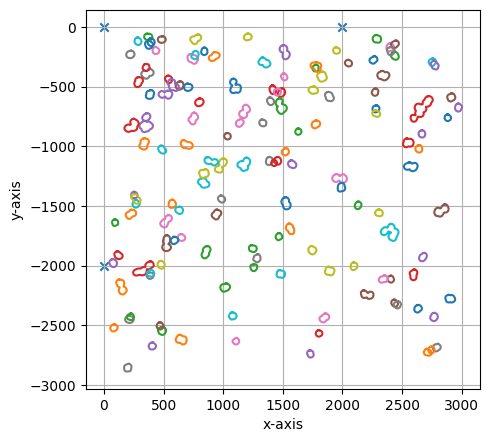

===== Collection Stats =====
Number of shapes: 146
Number of vertices: 11,167
Mean vertices: 76
Min vertices: 52
5% percentile vertices: 57
Median vertices: 68
95% percentile vertices: 111
Max vertices: 233
[0 0]
[      0 -200000]
[200000      0]
[27/02/2025 18:01:49] Saved output at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_WGA/selection/large_cells_small_cells.xml
[27/02/2025 18:01:49] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/LMDSelection_5z2yoo12'>


In [12]:
project.select(cells_to_select, calibration_marker)